<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/Fatoriales_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño Factorial: Tres Factores**
## **Nuestras librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

# **1. Ejercicio 1**

- ***Se llevaron a cabo un experimento 2^2 con 3 réplicas para evaluar la capacidad de limpieza de una solución en pruebas de lavado, A: Cantidad de Bicarbonato de sodio [5 y 10 %] y B: Cantidad de celulosa de carboximetilo de sodio [2 y 4%]. Si las sumas de las réplicas de cada corrida son las siguientes	(1) = 21;	a =11; 	b =23	ab = 29.***


| configuración | A| B  |Suma Corridas Capacidad de limpieza|
|:---:| :---: | :---: | :---:|
|	 (1)  | -1 | -1 |	21 |
|  a    | 1 | -1 |	11 |
|  b    |-1 | 1 | 23 |
|	 ab   | 1 | 1 |	29 |



# **2. Importando una base de datos a Python**

In [ ]:
#import cv2 as cv
#from google.colab import files
#uploaded=files.upload()

In [ ]:
A  =   [-1, 1, -1, 1]
B  =  [-1, -1, 1, 1]
Sumas_Limpieza = [21, 11, 23, 29]

data = pd.DataFrame({'Cantidad_bicarbonato':A, 'Cantidad_celulosa':B, 'Suma_Capacidad_Limpieza':Sumas_Limpieza})
data


,Cantidad_bicarbonato,Cantidad_celulosa,Suma_Capacidad_Limpieza
0,-1,-1,21
1,1,-1,11
2,-1,1,23
3,1,1,29


In [ ]:
contraste_a = data[data['Cantidad_bicarbonato']==1]['Suma_Capacidad_Limpieza'].sum()-data[data['Cantidad_bicarbonato']==-1]['Suma_Capacidad_Limpieza'].sum()
contraste_b = data[data['Cantidad_celulosa']==1]['Suma_Capacidad_Limpieza'].sum()-data[data['Cantidad_celulosa']==-1]['Suma_Capacidad_Limpieza'].sum()
contraste_ab = data[(data['Cantidad_celulosa']*data['Cantidad_bicarbonato'])==1]['Suma_Capacidad_Limpieza'].sum()-data[(data['Cantidad_celulosa']*data['Cantidad_bicarbonato'])==-1]['Suma_Capacidad_Limpieza'].sum()

efecto_a = contraste_a/(3*2)
efecto_b = contraste_b/(3*2)
efecto_ab = contraste_ab/(3*2)

round(efecto_ab,4)

2.6667

In [ ]:
SC_a = contraste_a**2/(3*2**(len(data.columns)-1))
SC_b = contraste_b**2/(3*2**(len(data.columns)-1))
SC_ab = contraste_ab**2/(3*2**(len(data.columns)-1))

round(SC_ab,3)

21.333

# **2. Ejercicio 2**

**Problema de aplicación 2. Una empresa electrónica quiere minimizar el número de piezas defectuosas generadas en el proceso conocido como “soldadora de ola”. Los factores y niveles son A: velocidad de conveyor (4 y 7 pies/min), B: temperatura de precalentado (80 y 120 grados), C: temperatura de soldadura (470 y 500 grados), debido a que el proceso es muy rápido se decide probar en cada condición de prueba 25 tarjetas, la variable de respuesta es el promedio de las 25 tarjetas, los resultados obtenidos son: (1) = <39, 45, 42>;   a = <110, 110, 104>;   b = <23,  27, 30>;   ab = <37, 39, 35>;     c = <42, 44, 43>;          ac = <146, 162, 153>;      bc = <31, 35, 39>;      abc	 = <42, 48, 38> .**


| configuración | A| B | C || Soldadora de ola||
|:---:| :---: | :---: | :---:| :---:| :---: | :---:|
|	 (1)  | -1 | -1 |	-1 |39 | 45 | 42|
|  a    | 1  | -1 |	-1 |110 | 110 | 104|
|  b    |-1  | 1  | -1 |23 | 27 | 30 |
|	 ab   | 1  | 1  |	-1 |37 | 39 | 35 |
|	 c    | -1 | -1 |	 1 |42 | 44 | 43 |
|  ac   | 1  | -1 |	 1 |146 | 162 | 153 |
|  bc   |-1  | 1  |  1 |31 | 35 | 39 |
|	 abc  | 1  | 1  |	 1 |42 | 48 | 38 |



In [ ]:
configu = ['(1)', 'a', 'b', 'ab', 'c', 'ac', 'bc', 'abc']
A = [-1, 1, -1, 1, -1, 1, -1, 1]
B = [-1, -1, 1, 1, -1, -1, 1, 1]
C = [-1, -1, -1, -1, 1, 1, 1, 1]
rendimiento = [39,110,23,37,42,146,31,42,45,110,27,39,44,162,35,48,42,104,30,35,43,153,39,38]
data = pd.DataFrame({'configu':configu*3,'A':A*3,'B':B*3, 'C' :C*3, 'rendimiento':rendimiento})
data['AB'] = data['A']*data['B']
data['BC'] = data['B']*data['C']
data['AC'] = data['A']*data['C']
data['ABC'] = data['A']*data['B']*data['C']
data

,configu,A,B,C,rendimiento,AB,BC,AC,ABC
0,(1),-1,-1,-1,39,1,1,1,-1
1,a,1,-1,-1,110,-1,1,-1,1
2,b,-1,1,-1,23,-1,-1,1,1
3,ab,1,1,-1,37,1,-1,-1,-1
4,c,-1,-1,1,42,1,-1,-1,1
5,ac,1,-1,1,146,-1,-1,1,-1
6,bc,-1,1,1,31,-1,1,-1,-1
7,abc,1,1,1,42,1,1,1,1
8,(1),-1,-1,-1,45,1,1,1,-1
9,a,1,-1,-1,110,-1,1,-1,1


In [ ]:
model2 = ols('rendimiento ~ (A+B+C)**3',                 # Model formula
            data = data).fit()

anova_result = sm.stats.anova_lm(model2, typ=1)
print (anova_result)

            df        sum_sq       mean_sq           F        PR(>F)
A          1.0  14210.666667  14210.666667  789.481481  4.802673e-15
B          1.0  15810.666667  15810.666667  878.370370  2.076828e-15
C          1.0   1380.166667   1380.166667   76.675926  1.684865e-07
A:B        1.0   9440.666667   9440.666667  524.481481  1.173827e-13
A:C        1.0    661.500000    661.500000   36.750000  1.647284e-05
B:C        1.0    400.166667    400.166667   22.231481  2.335493e-04
A:B:C      1.0    840.166667    840.166667   46.675926  4.030032e-06
Residual  16.0    288.000000     18.000000         NaN           NaN


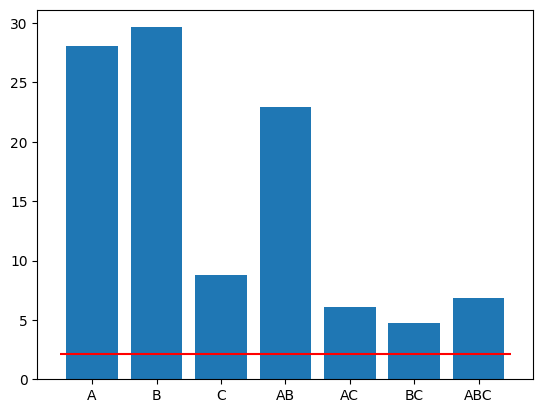

In [ ]:
efectos ={}
efec_name = ['A', 'B', 'C', 'AB', 'AC', 'BC', 'ABC']

for name in efec_name:
  efecto = (data['rendimiento'][data[name]==1].sum()-data['rendimiento'][data[name]==-1].sum())/(3*2**2)
  efectos[name] = efecto

estimacion_estandar_error = (anova_result['mean_sq'].Residual/(3*2**1))**0.5

efecto_standarizado = {}

for name in efectos.items():
  efecto_standarizado[name[0]]=name[1]/estimacion_estandar_error

bars = 2.1199053

#plt.plot(efecto_standarizado)

names = list(efecto_standarizado.keys())
values = list(efecto_standarizado.values())

values = [abs(result) for result in values]

plt.bar(range(len(efecto_standarizado)), values, tick_label=names)
plt.hlines(xmin=-0.5, xmax=6.5, y = bars, color='red')
plt.show()

In [ ]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+b1*x[0] + b2*x[1] + b3*x[2] + b4*x[0]*x[1] + b5*x[0]*x[2] + b6*x[1]*x[2] + b7*x[0]*x[1]*x[2])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(m,0)-1 for m in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1.0, -1.0, 1.0]
Valor Máximo: 98.16666666669522


In [ ]:
anova_result = anova_result.reset_index()

In [ ]:
anova_result_var = anova_result.copy()
anova_result

,index,df,sum_sq,mean_sq,F,PR(>F)
0,A,1.0,14210.666667,14210.666667,789.481481,4.802673e-15
1,B,1.0,15810.666667,15810.666667,878.370370,2.076828e-15
2,C,1.0,1380.166667,1380.166667,76.675926,1.684865e-07
3,A:B,1.0,9440.666667,9440.666667,524.481481,1.173827e-13
4,A:C,1.0,661.500000,661.500000,36.750000,1.647284e-05
5,B:C,1.0,400.166667,400.166667,22.231481,2.335493e-04
6,A:B:C,1.0,840.166667,840.166667,46.675926,4.030032e-06
7,Residual,16.0,288.000000,18.000000,NaN,NaN


In [ ]:
anova_result_var.loc[0,'F'] = round(anova_result_var['mean_sq'][0]/anova_result_var['mean_sq'][4],2)
anova_result_var.loc[1,'F'] = round(anova_result_var['mean_sq'][1]/anova_result_var['mean_sq'][5],2)
anova_result_var.loc[2,'F'] = round(anova_result_var['mean_sq'][2]/anova_result_var['mean_sq'][6],2)
anova_result_var.loc[3,'F'] = round(anova_result_var['mean_sq'][3]/anova_result_var['mean_sq'][7],2)
anova_result_var.loc[4,'F'] = round(anova_result_var['mean_sq'][4]/anova_result_var['mean_sq'][7],2)
anova_result_var.loc[5,'F'] = round(anova_result_var['mean_sq'][5]/anova_result_var['mean_sq'][7],2)
anova_result_var.loc[6,'F'] = round(anova_result_var['mean_sq'][6]/anova_result_var['mean_sq'][7],2)
anova_result_var

,index,df,sum_sq,mean_sq,F,PR(>F)
0,A,1.0,14210.666667,14210.666667,21.48,4.802673e-15
1,B,1.0,15810.666667,15810.666667,39.51,2.076828e-15
2,C,1.0,1380.166667,1380.166667,1.64,1.684865e-07
3,A:B,1.0,9440.666667,9440.666667,524.48,1.173827e-13
4,A:C,1.0,661.500000,661.500000,36.75,1.647284e-05
5,B:C,1.0,400.166667,400.166667,22.23,2.335493e-04
6,A:B:C,1.0,840.166667,840.166667,46.68,4.030032e-06
7,Residual,16.0,288.000000,18.000000,NaN,NaN


#Intento Calculo P y efectos mixtos

In [ ]:
import scipy.stats as stats
df_num = 1
df_denom=1
p_value =1 - stats.f.cdf(anova_result_var['F'][1], df_num, df_denom)
p_value


0.10043895293043281

In [ ]:
from scipy.stats import binom
rv = stats.binom(23,0.05)

1-rv.cdf(anova_result_var['F'][3])

0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Material': ['Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico'],
    'Fuente': ['F1', 'F2', 'F3', 'F4', 'F5']*6,
    'Vibración': [13.1, 16.3, 13.7, 15.7, 13.5, 13.2, 15.8, 14.3, 15.8, 12.5, 15.0, 15.7, 13.9, 13.7, 13.4, 14.8, 16.4, 14.3, 14.2, 13.8, 14.0, 17.2, 12.4, 14.4, 13.2, 14.3, 16.7, 12.3, 13.9, 13.1]
})

# Crear el modelo mixto
model = mixedlm("Vibración ~ Material * Fuente", data, groups=data["Fuente"])

#anova_result = sm.stats.anova_lm(model, typ=1)

# Ajustar el modelo
result = model.fit()

# Imprimir el resumen
print(result.summary())

#anova_result.summary()

                   Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        Vibración
No. Observations:        30             Method:                    REML     
No. Groups:              5              Scale:                     0.1113   
Min. group size:         6              Log-Likelihood:            -10.0185 
Max. group size:         6              Converged:                 Yes      
Mean group size:         6.0                                                
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                         13.150    0.409 32.179 0.000 12.349 13.951
Material[T.Aluminio]               1.750    0.334  5.245 0.000  1.096  2.404
Material[T.Plástico]               1.000    0.334  2.997 0.003  0.346  1.654
Fuente[T.F2]       

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM


# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Material': ['Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico'],
    'Fuente': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Vibración': [13.1, 16.3, 13.7, 15.7, 13.5, 13.2, 15.8, 14.3, 15.8, 12.5, 15.0, 15.7, 13.9, 13.7, 13.4, 14.8, 16.4, 14.3, 14.2, 13.8, 14.0, 17.2, 12.4, 14.4, 13.2, 14.3, 16.7, 12.3, 13.9, 13.1]
})



# Create a mixed-effects model with Type III sums of squares
#formula = "Vibración ~ Material * Fuente"
#model = MixedLM.from_formula(formula, data=data, re_formula="1", vc_formula="1", groups="Fuente")
#result = model.fit()

# Print the summary of the ANOVA with Type III sums of squares
#print(result.summary())

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Material': ['Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Acero', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Aluminio', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico', 'Plástico'],
    'Fuente': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Vibración': [13.1, 16.3, 13.7, 15.7, 13.5, 13.2, 15.8, 14.3, 15.8, 12.5, 15.0, 15.7, 13.9, 13.7, 13.4, 14.8, 16.4, 14.3, 14.2, 13.8, 14.0, 17.2, 12.4, 14.4, 13.2, 14.3, 16.7, 12.3, 13.9, 13.1]
})

formula = "Vibración ~ Material + Fuente"
model = smf.mixedlm(formula, data, groups=data["Fuente"])
result = model.fit()

# Imprimir el resumen del modelo
print(result.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   Vibración
No. Observations:     30        Method:               REML     
No. Groups:           5         Scale:                0.5772   
Min. group size:      6         Log-Likelihood:       -39.5208 
Max. group size:      6         Converged:            Yes      
Mean group size:      6.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            15.400    1.365 11.279 0.000 12.724 18.076
Material[T.Aluminio]  0.130    0.340  0.383 0.702 -0.536  0.796
Material[T.Plástico] -0.240    0.340 -0.706 0.480 -0.906  0.426
Fuente               -0.337    0.407 -0.826 0.409 -1.135  0.462
Group Var             1.563    1.896                           



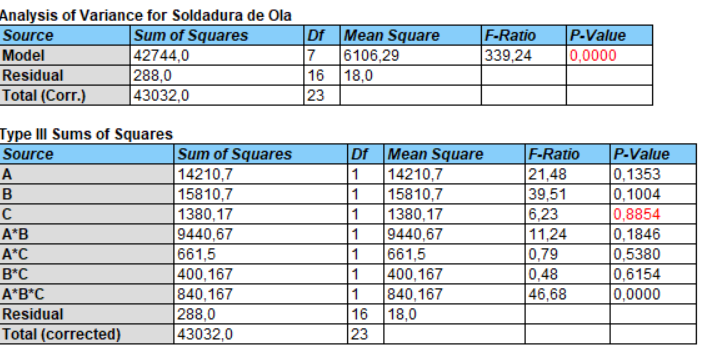

# **3. Ejercicio 3**

**Planteamiento 3. Se está estudiando la dureza de una tableta, medida en Kg fuerza. Se Piensa que depende de A: tipo de proceso [Vía húmeda: 1, vía seca : 2, granulado: 3] y B: concentración de carbón activado [1% :1, 2% : 2]. Se efectúa un experimento que consiste en tomar 2 réplicas de la dureza para cada combinación (a,b) de los niveles de los factores. Los resultados del experimento son los siguientes: (1,1) =218, (1,2) = 187, (2,1) = 202, (2,2) = 204; (3,1) = 175;  (3,2) = 217; (1,1) =205, (1,2) = 201, (2,1) = 220, (2,2) = 233; (3,1) = 179;  (3,2) = 301.**

| A| B ||  Soldadora de ola|||
| :---: | :---: | :---:| :---: | :---:|:---:|
| A1  | B1 ||	218 | 205|
| A1  | B2 ||	187| 201|
| A2  | B1 || 202  | 220|
| A2  | B2 ||	204 | 233|
| A3  | B1 ||	175 | 179|
| A3  | B2 ||	217|301|




In [ ]:
A = ['A1','A1','A2','A2','A3','A3']*2
B = ['B1','B2',]*6
Dureza = [218, 187, 202, 204, 175, 217, 205, 201, 220, 233, 179, 301]
data = pd.DataFrame({'A':A,'B':B, 'Dureza':Dureza})
data

,A,B,Dureza
0,A1,B1,218
1,A1,B2,187
2,A2,B1,202
3,A2,B2,204
4,A3,B1,175
5,A3,B2,217
6,A1,B1,205
7,A1,B2,201
8,A2,B1,220
9,A2,B2,233


In [ ]:
# **4.7 Análisis de Varianza Tipo II**
modelo_factorial = ols("Dureza ~ A*B", data = data).fit()
anova_result2 = sm.stats.anova_lm(modelo_factorial, typ=1)
print (anova_result2)

           df       sum_sq      mean_sq         F    PR(>F)
A         2.0   516.166667   258.083333  0.360033  0.711760
B         1.0  1728.000000  1728.000000  2.410602  0.171504
A:B       2.0  5358.500000  2679.250000  3.737619  0.088276
Residual  6.0  4301.000000   716.833333       NaN       NaN
